# 《参考》自動微分: TensorFlow の場合

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Text(0, 0.5, 'loss')

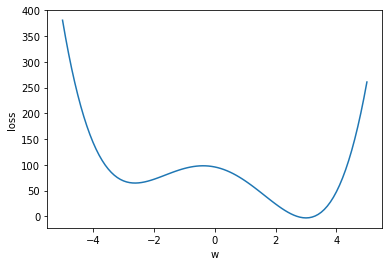

In [2]:
def loss_fn(w):
    return w**4 - 16 * w**2 - 12 * w + 96

ws = np.linspace(-5, 5, 101)
plt.plot(ws, loss_fn(ws))
plt.xlabel('w')
plt.ylabel('loss')

### パラメーターの更新式
$w \rightarrow w - \alpha \frac{\partial loss}{\partial w}$
<br>
loss: 損失関数
<br>
$\alpha$: 学習率 (learning rate)

In [3]:
w = tf.Variable(0.0)
loss = loss_fn(w)
print(loss)

tf.Tensor(96.0, shape=(), dtype=float32)


In [4]:
def iterate(w_init, alpha, n):
    w = tf.Variable(w_init)
    w_history = [w_init]
    for _ in range(n):
        with tf.GradientTape() as t:
            loss = loss_fn(w)
            w.assign_sub(alpha * t.gradient(loss, w))
        w_history.append(w.numpy())
    return w_history

In [5]:
iterate(0.0, 0.01, 20)

[0.0,
 0.12,
 0.27833086,
 0.48653424,
 0.75761837,
 1.1026617,
 1.5218861,
 1.9878938,
 2.4297957,
 2.7535188,
 2.9195724,
 2.9783893,
 2.9946456,
 2.9987047,
 2.9996886,
 2.9999251,
 2.999982,
 2.9999957,
 2.999999,
 2.9999998,
 3.0]

In [6]:
iterate(0.0, 0.1, 20)

[0.0,
 1.2,
 5.5488005,
 -43.832264,
 33502.508,
 -15041529000000.0,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [7]:
def plot_iterations(w_history):
    ws = np.linspace(-4, 4, 101)
    fig, axes = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    axes[0].plot(ws, loss_fn(ws))
    axes[0].set_xlabel('w')
    axes[0].set_ylabel('loss')
    axes[1].plot(w_history, range(len(w_history)), 'bo-')
    axes[1].invert_yaxis()
    axes[1].set_ylabel('iteration')

## うまく最小値に収束するケース

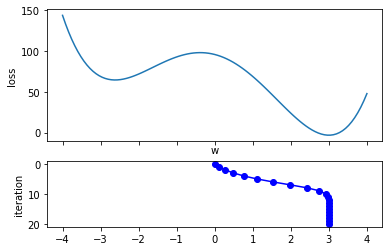

In [8]:
plot_iterations(iterate(0.0, 0.01, 20))

## 初期値が同じでも学習率 $\alpha$ が大きいと極小値に収束してしまうこともある

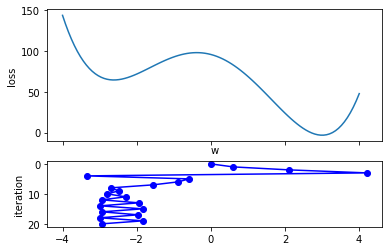

In [9]:
plot_iterations(iterate(0.0, 0.05, 20))

## 学習率 $\alpha$ が大きいと最小値の周りで振動したり、最悪発散してしまうこともある

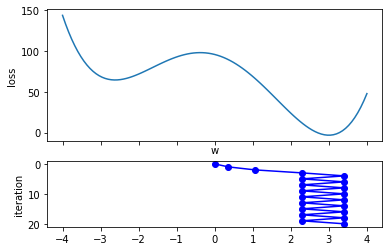

In [10]:
plot_iterations(iterate(0.0, 0.03, 20))